# Krypton XY Lifetime maps

## SM: Single Map (in time). 

### Author: GML, JAH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [206]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Last updated on  Mon Oct  8 23:32:01 2018


### Logger

In [207]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2018-10-08 23:32:02,926 | INFO : Hello world!


### Input files

In [208]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

input_file_names  = ['dst_6353_trigger1_0000_9453.h5']
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_6353.h5'
map_file_name_ts  = 'kr_maps_xy_ts_6353.h5'
emap_file_name    = ' '


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [210]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [211]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [212]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [213]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [214]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [215]:
from krcal.core.stat_functions      import mean_and_std

In [216]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map
from krcal.core.analysis_functions  import plot_sector
from krcal.core.analysis_functions  import plot_sectors
from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [217]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_functions    import print_fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [218]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs

In [219]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [220]:
from krcal.core.map_functions   import draw_wedges
from krcal.core.map_functions   import define_rphi_sectors
from krcal.core.map_functions   import rphi_sector_alpha_map
from krcal.core.map_functions   import rphi_sector_map
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import draw_maps
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import draw_xy_maps
from krcal.core.map_functions   import draw_xy_map
from krcal.core.map_functions   import draw_xy_maps_ts
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [221]:
import krcal.dev.corrections       as corrections 


In [222]:
from numpy import pi, sqrt

In [223]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [224]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger

In [225]:
log = logging.getLogger()

### Input/output 

In [226]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [227]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6353_trigger1_0000_9453.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_6353.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_ts_6353.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/ ')

In [228]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [229]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {number_of_evts_full}")

Total number of events: 961462


In [230]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [231]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [232]:
RMAX      = 200

s1e_range = (3, 25)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 14000)
lt_range = (1000, 6000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 10,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [233]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

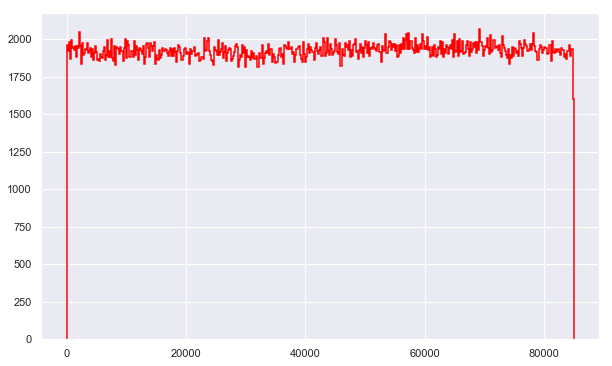

In [234]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

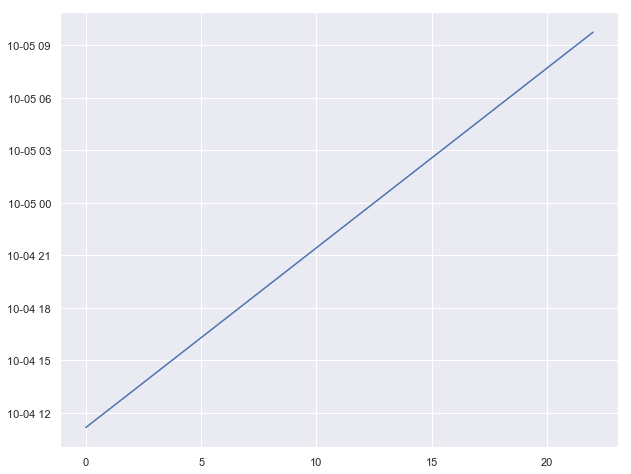

In [235]:
plt.plot(krTimes.timeStamps)

### Event distribution

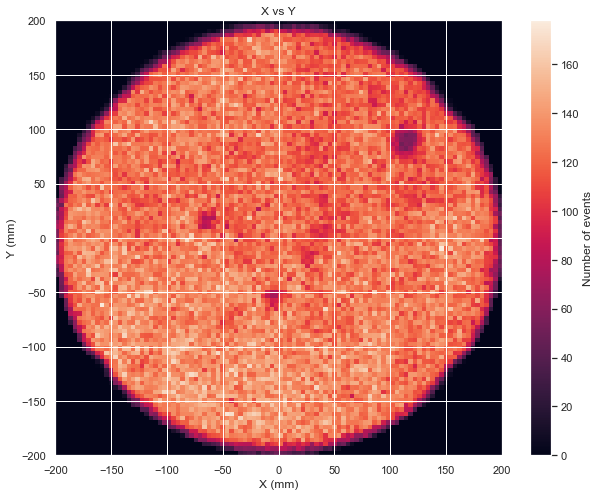

In [236]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Time series

In [237]:
log.setLevel(logging.INFO)

### Divide dst in 20 time series

In [238]:
nt = 20
t0 = time.time()

ts, masks = get_time_series(nt, DT[-1], kge)  
t1 = time.time()
print(f' get_time_series: t = {t1 -t0}')

 get_time_series: t = 0.035900115966796875


In [239]:
print(f'tlast = {DT[-1]}')
print(f'ts = {ts}, len(masks) = {len(masks)}' )

tlast = 85009.34500002861
ts = [2125.0, 6375.0, 10625.0, 14875.0, 19125.0, 23375.0, 27625.0, 31875.0, 36125.0, 40375.0, 44625.0, 48875.0, 53125.0, 57375.0, 61625.0, 65875.0, 70125.0, 74375.0, 78625.0, 82875.0, 82879.5], len(masks) = 21


### Fit lifetime of a time series

In [240]:
t0 = time.time()
fps = time_fcs(ts, masks, kge, 
               nbins_z = 25,
               nbins_e = 50,
               range_z = (10, 550),
               range_e = (7000, 14000),
               energy  = 'S2e',
               fit     = FitType.profile)
t1 = time.time()
print(f' time_fcs: t = {t1 -t0}')

 time_fcs: t = 0.24747490882873535


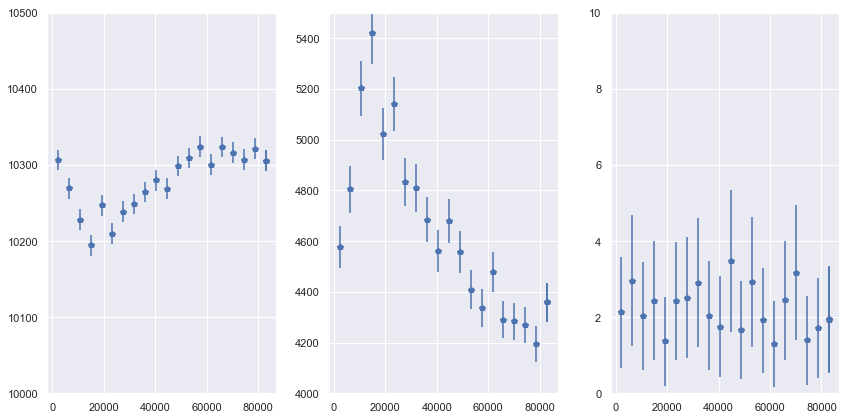

In [241]:
plot_time_fcs(fps,
              range_chi2  = (0,10),
              range_e0    = (10000,10500),
              range_lt    = (4000, 5500),
              figsize     = (12,6))

## Divide chamber in sectors of XY

In [242]:
t0 = time.time()
KRES = select_xy_sectors(dst, DT, dst.S2e.values, dst.S2q.values, krBins.X, krBins.Y)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 42.899073123931885


In [243]:
neM = event_map(KRES)

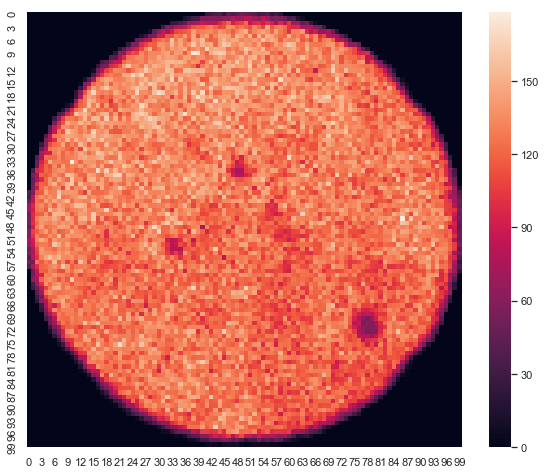

In [244]:
ax = sns.heatmap(neM, square=True)

#### Notice that binning in X-Y does not take advantage of the chamber symmetry which is obviously R-phi. Thus, many bins in the KRES map will be zero. 

## Fits in XY sectors

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```
Thus, each bin contains 6 time series; ts is time (time difference wrt to the start of the run); e0, lt... are fitted parameters to time slices.

### Single time bin

In [245]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 23.496511936187744


In [246]:
times = fpmxy[0][0].ts

In [247]:
times

[42504.5]

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [248]:
tsm = tsmap_from_fmap(fpmxy)

<ErrorbarContainer object of 3 artists>

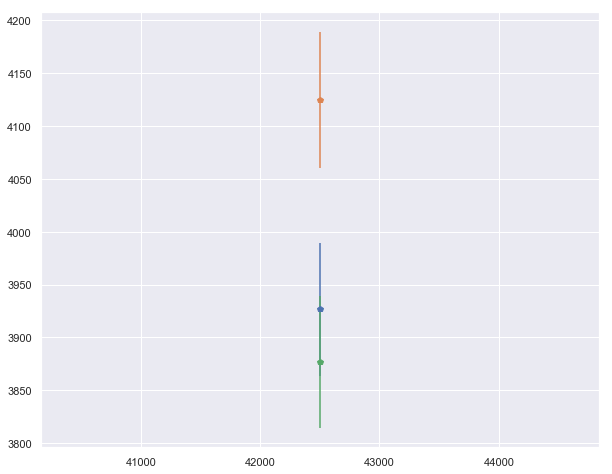

In [249]:
plt.errorbar(times, tsm.lt[25][25], np.sqrt(tsm.lt[25][25]), fmt="p")
plt.errorbar(times, tsm.lt[25][21], np.sqrt(tsm.lt[25][21]), fmt="p")
plt.errorbar(times, tsm.lt[25][22], np.sqrt(tsm.lt[25][22]), fmt="p")

<ErrorbarContainer object of 3 artists>

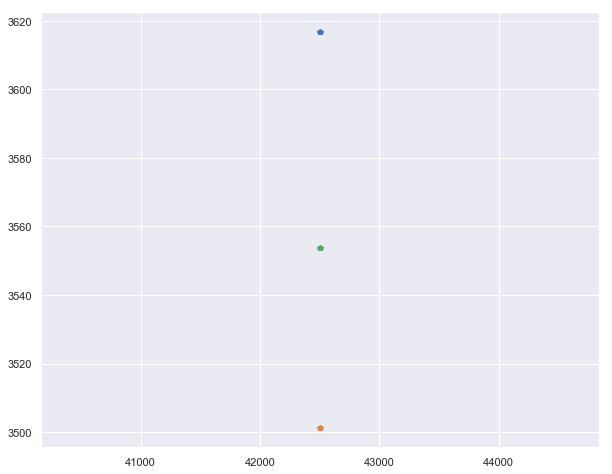

In [250]:
plt.errorbar(times, tsm.lt[60][10], np.sqrt(tsm.lt[6][10]), fmt="p")
plt.errorbar(times, tsm.lt[60][11], np.sqrt(tsm.lt[6][11]), fmt="p")
plt.errorbar(times, tsm.lt[60][12], np.sqrt(tsm.lt[6][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### Example: map in the first time series

In [251]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [252]:
amap_average(am) 

ASectorMap(chi2=1.0609023810976392, e0=10296.965163780826, lt=3711.6605533104744, e0u=41.9825099223993, ltu=171.40662699862688)

#### Get rid of outlayers that distort mean and error

In [253]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3500.0


In [254]:
amap_average(rmap)

ASectorMap(chi2=1.0609023810976392, e0=10296.965163780826, lt=3711.6605533104744, e0u=41.9825099223993, ltu=171.40662699862688)

In [255]:
asm = relative_errors(rmap)

In [256]:
amap_average(asm)

ASectorMap(chi2=1.0609023810976392, e0=10296.965163780826, lt=3711.6605533104744, e0u=0.4140084322772795, ltu=4.620188045190607)

#### Draw the maps using default colormap

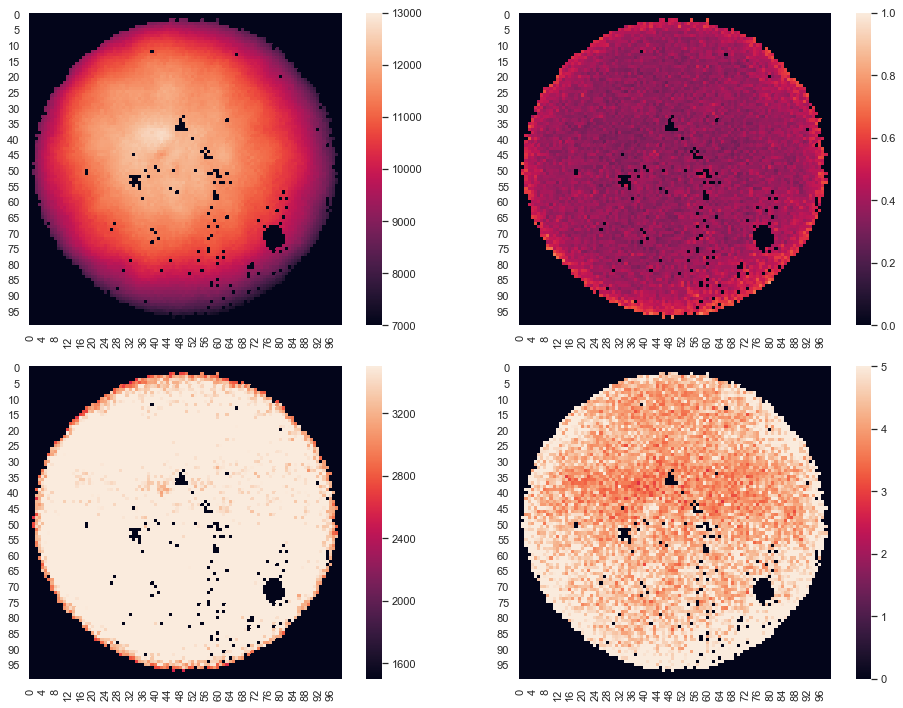

In [257]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Profile version

In [125]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.profile,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 13.96854281425476


In [126]:
tsm = tsmap_from_fmap(fpmxy)

In [127]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [128]:
amap_average(am) 

ASectorMap(chi2=1.2593316656383946, e0=10287.538771246811, lt=3525.1909987921813, e0u=35.77300316298778, ltu=146.25248563504493)

In [129]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3500.0


In [131]:
asm = relative_errors(rmap)

In [134]:
amv = amap_average(asm)

In [135]:
amv

ASectorMap(chi2=1.2593316656383946, e0=10287.538771246811, lt=3525.1909987921813, e0u=0.3520791584184551, ltu=4.1507846928372185)

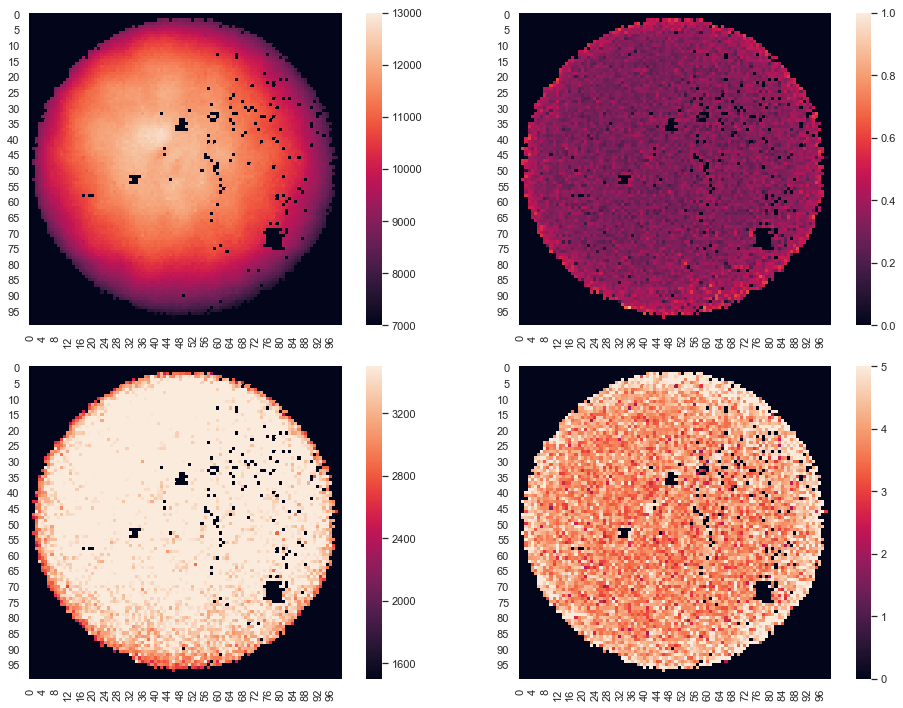

In [133]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

#### Profile and unbined versions behave the same. What is the origing of the dark spots??

In [136]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [137]:
amap_average(asmAv)

ASectorMap(chi2=1.2513786164110132, e0=10460.51606447321, lt=3561.571643514189, e0u=0.3472318099451105, ltu=4.110753536185222)

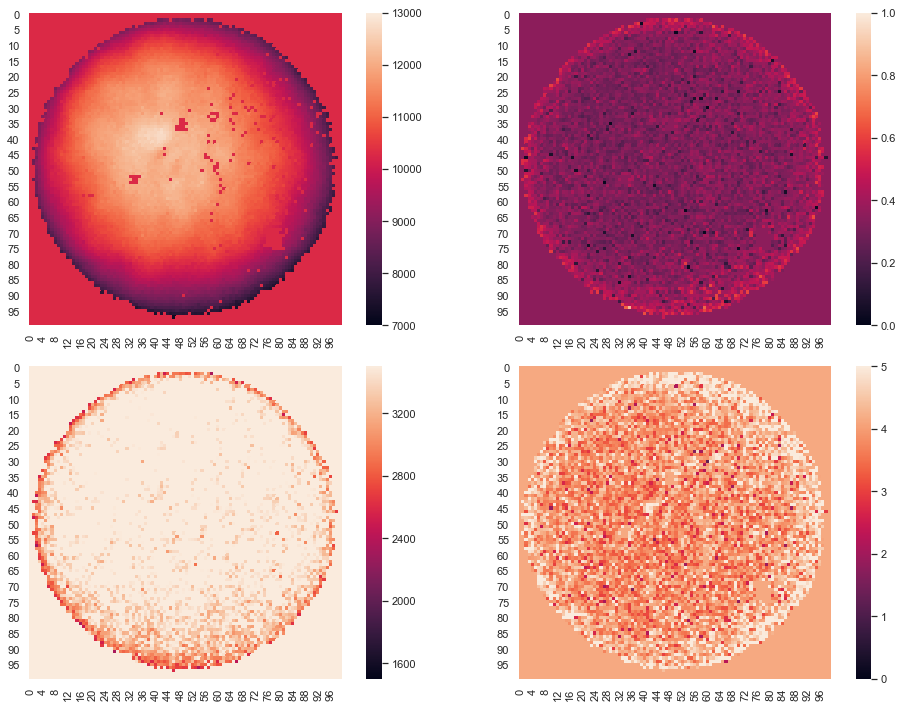

In [138]:
draw_xy_maps(asmAv,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Or using a specific colormap

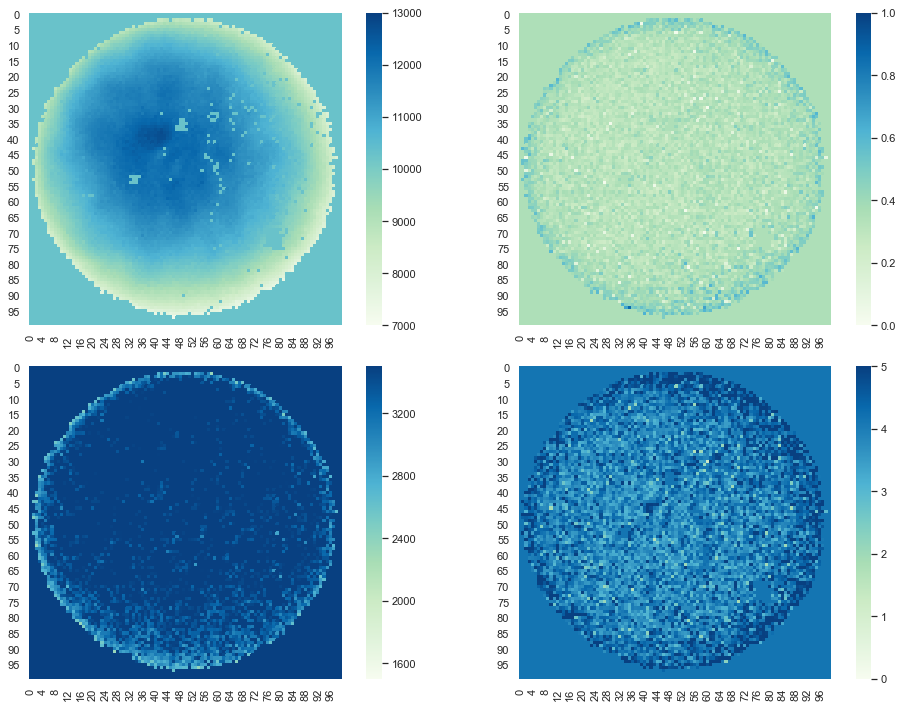

In [179]:
draw_xy_maps(asmAv,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))


### Use several time intervals

In [180]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 3,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.profile,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 58.86135792732239


In [181]:
tsm = tsmap_from_fmap(fpmxy)

In [185]:
times = fpmxy[0][0].ts

In [186]:
times

[14497.5, 43492.5, 72487.5, 72488.5]

## Compute the average of maps

### Get all amaps (for each time interval). Maps returned are regularized and errors relative.

In [187]:
amaps = get_maps_from_tsmap(tsm, 
                            times   = times, 
                            erange  = e_range,
                            ltrange = lt_range,
                            c2range = c2_range)


In [188]:
len(amaps)

4

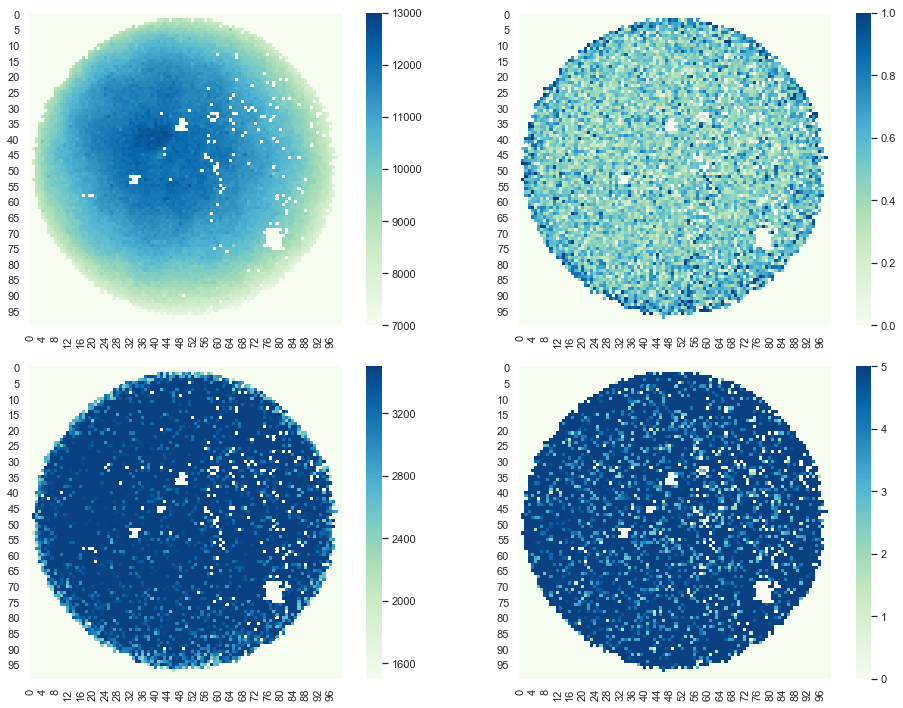

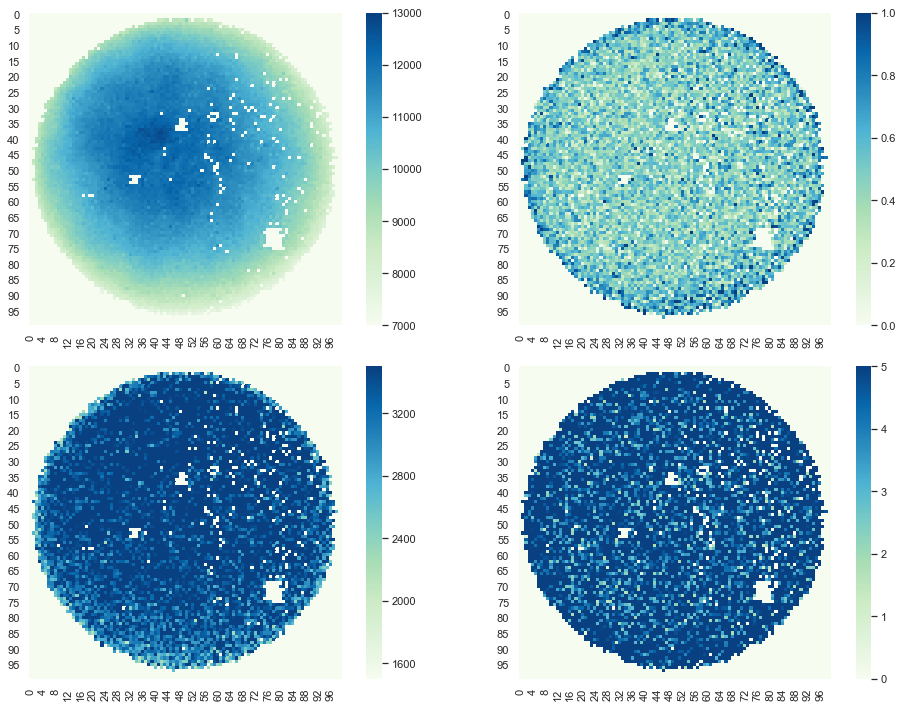

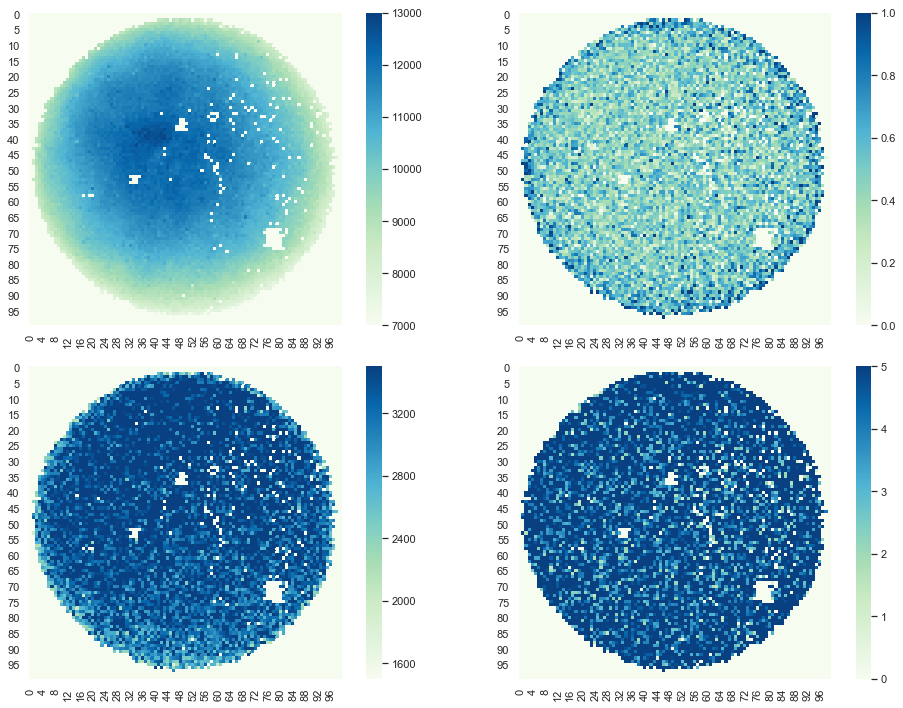

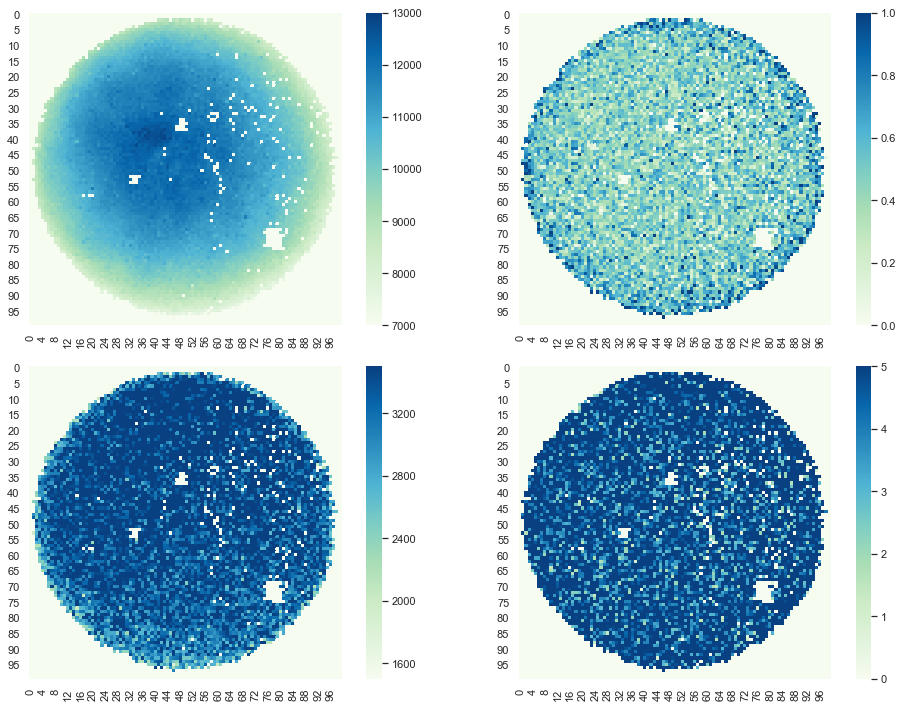

In [189]:
for amap in amaps:
    draw_xy_maps(amap,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [190]:
amAV = map_average(amaps)

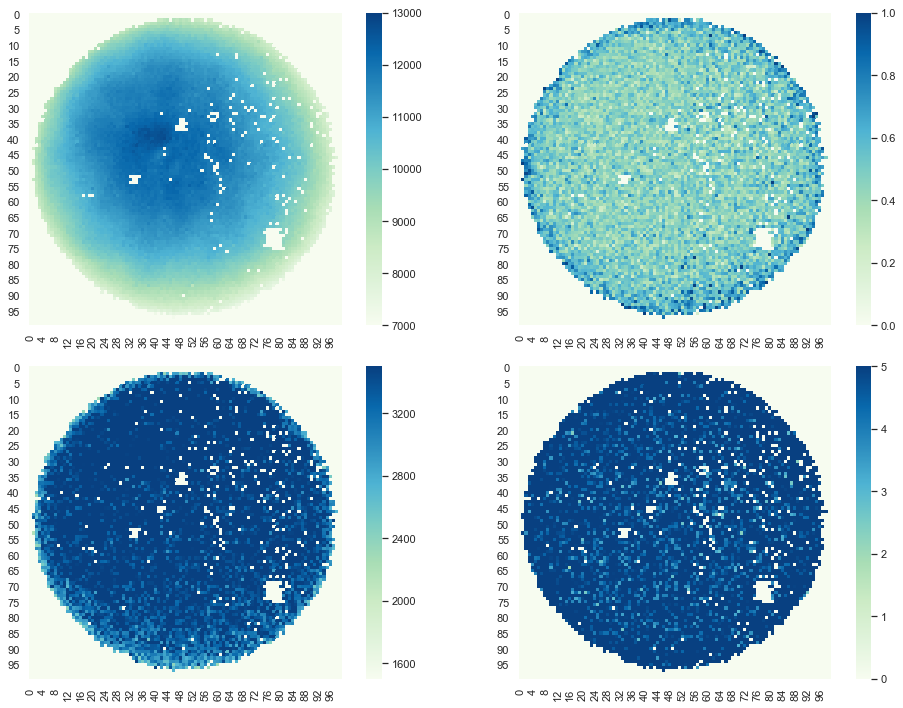

In [191]:
draw_xy_maps(amAV,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [192]:
amv = amap_average(amAV) 

In [193]:
amv

ASectorMap(chi2=2.5540478931877986, e0=10295.384263656404, lt=3525.3848461714665, e0u=0.5154514852286618, ltu=6.0212043507984925)

### Next, NaNs are replaced by the average values of the variables (this is needed for the corrections). 

In [194]:
amAV0 = amap_replace_nan_by_mean(amAV, amMean=amv)

In [195]:
amap_average(amAV0) 

ASectorMap(chi2=2.5548518633827215, e0=10468.831299732636, lt=3560.3270347646317, e0u=0.5034909958208532, ltu=5.914947803106531)

In [196]:
amap_max(amAV0)

ASectorMap(chi2=322.5260427736313, e0=12790.684673801252, lt=4991.628234996526, e0u=1.3931837694520275, ltu=19.232327758082377)

In [197]:
amap_min(amAV0)

ASectorMap(chi2=0.23992276932643689, e0=7166.109329374402, lt=2187.1743239068737, e0u=0.07697821698146921, ltu=1.8786038429851584)

In [198]:
aMaps = []
for amap in amaps:
    amv = amap_average(amap) 
    aMaps.append(amap_replace_nan_by_mean(amap, amv))


### The maps can be saved to file

In [199]:
write_maps(amAV0, filename=fn.map_file_name)

### And retrieved from file

In [200]:
amap2 = read_maps(filename=fn.map_file_name)

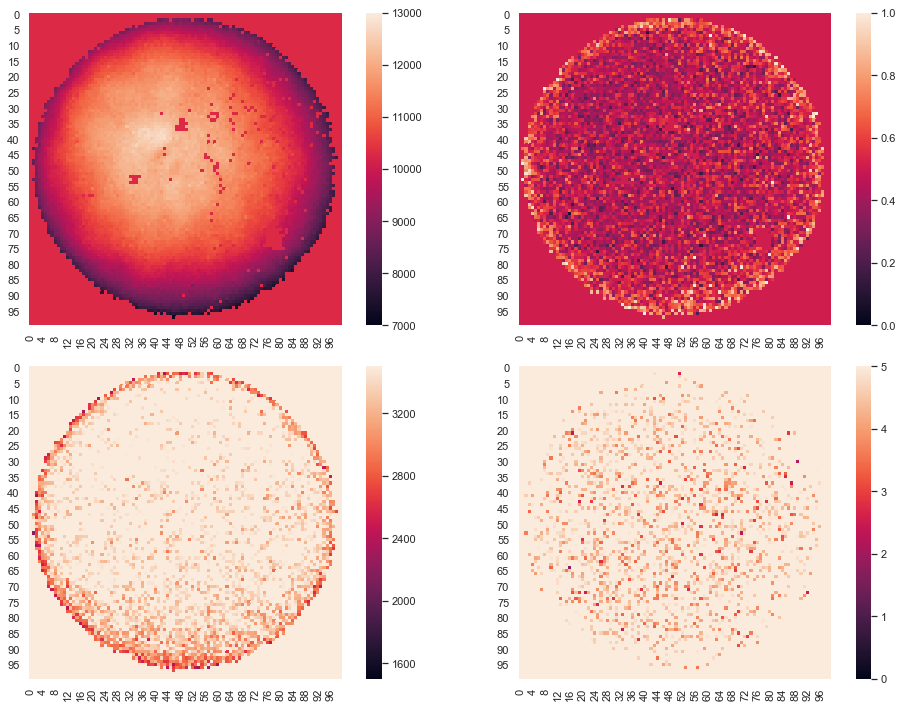

In [201]:
draw_xy_maps(amap2,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0, 1),
            lulims  = (0, 5),
            figsize=(14,10))

### To write the complete time-series of maps
```
write_maps_ts(aMaps : Iterable[ASectorMap], ts: np.array, filename : str)
```

In [202]:
write_maps_ts(aMaps, times, filename=fn.map_file_name_ts)

#### They can be read back

In [203]:
ts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [204]:
ts

0    14497.5
1    43492.5
2    72487.5
3    72488.5
dtype: float64

### One can plot the maps selected by type:

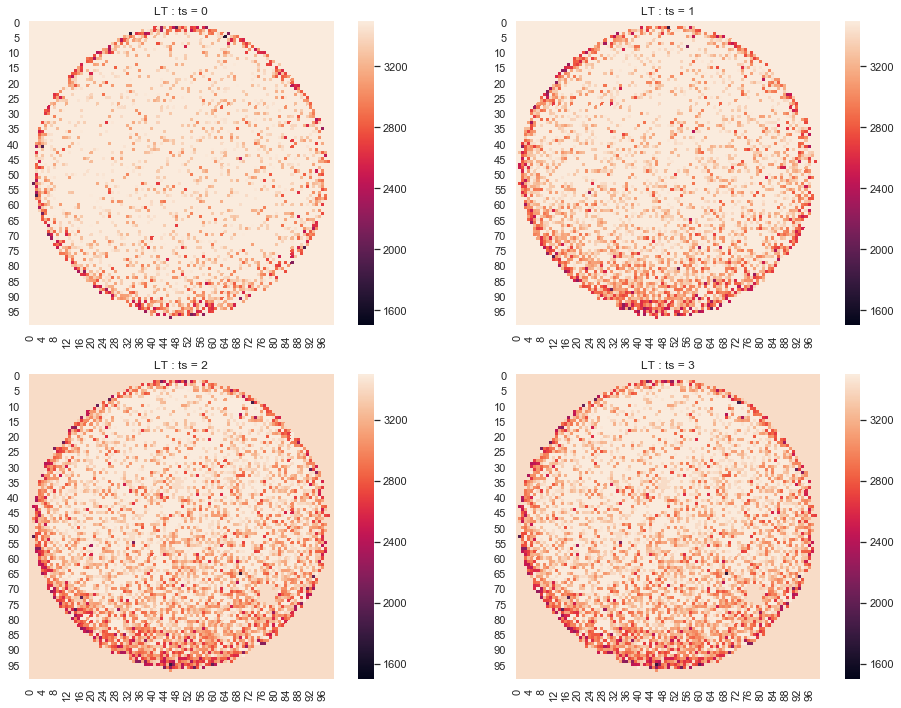

In [205]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.LT,
                ltlims  = (1500, 3500),
                figsize = (14,10))